1번

In [5]:
# numerical differential
def numerical_diff(x):
    p1 = x*x + 2*x + 1 
    n = 1e-7 # 가장 작은 값
    p2 = (x+n)*(x+n) + 2*(x+n) + 1 # 이차식
    diff_result = (p2 - p1) / n # dy / dx
    return diff_result


print("x^2+2x+1 함수의 x=2지점에서의 미분값은", numerical_diff(2), "입니다.")

x^2+2x+1 함수의 x=2지점에서의 미분값은 6.000000087880153 입니다.


2번

In [6]:
# 2-1
f = open("Linear_regression.txt",'r') # linear_regression.txt 파일을 읽기 전용으로 open
lines = f.readlines() # 모든 라인의 데이터를 load
x_data = [] # hours
y_data = [] # dolls

for line in lines:
    line_data = line.split(' ') # split 명령어 안에 있는 string 데이터로 데이터를 나누어 리스트형태로 변환하는 함수
    x_data.append(line_data[1])
    y_data.append(line_data[2].strip()) # strip() : \n 제거
f.close()


In [7]:
# 2-2
import numpy as np

lr = 0.01  

# 선형 회귀 함수
def linear_regression(ep):
  a, b = 0, 0 # 파라미터들의 초기값
  n = len(x_data)

  for i in range(ep):
    pred = a*x_data + b # 예측선
    loss = np.sum((pred - y_data) ** 2) / n # 오차 (최소제곱법)

    # 최소제곱오차 미분들의 합
    gradient_a = np.sum((pred - y_data) * 2 * x_data) / n
    gradient_b = np.sum((pred - y_data) * 2) / n

    # 파라미터 업데이트
    a = a - lr*gradient_a
    b = b - lr*gradient_b

    # print('pred = ', a * x_data + b) 

  return (a, b) # 파라미터 반환

 

x_data = list(map(float, x_data))
x_data = np.array(x_data)
y_data = list(map(int, y_data))
y_data = np.array(y_data)

w = linear_regression(1000)

print("=== Parameter ===")
print("Weight : ", w[0])
print("Bias : ", w[1])

=== Parameter ===
Weight :  5.190030070233077
Bias :  -0.6674161578618184


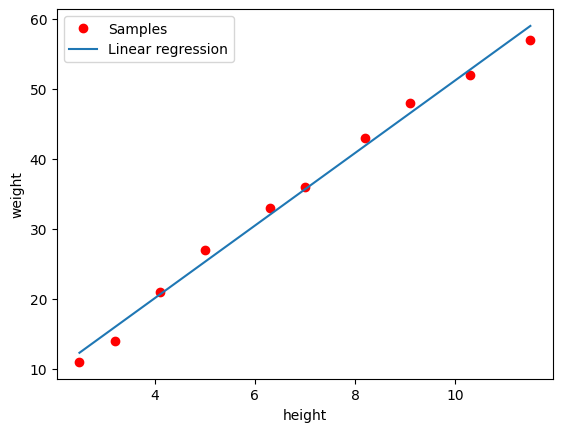

In [8]:
# 2-3

from matplotlib import pyplot as plt

# 선형 모델 및 학습 데이터 시각화
y_pred = w[0] * x_data + w[1]
plt.plot(x_data, y_data, 'ro')
plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)])
plt.xlabel('height')
plt.ylabel('weight')
plt.legend(['Samples', 'Linear regression'])
plt.show() 

In [9]:
# 2-4

x = 7.3 # 테스트 데이터
y = w[0] * x + w[1] # 예측
print("학습 모델에 의해 예측한", x ,"시간 작업하였을 때 완성된 인형은", y, "개입니다.")

학습 모델에 의해 예측한 7.3 시간 작업하였을 때 완성된 인형은 37.21980335483965 개입니다.


3번

In [10]:
# 3-1

f = open("Linear_classification.txt",'r') # linear_regression.txt 파일을 읽기 전용으로 open
lines = f.readlines() # 모든 라인의 데이터를 load
x = [] # s 용량
y = [] # label (+1 -> 실험 성공, -1 -> 실험 실패)

for line in lines:
    line_data = line.split(' ') # split 명령어 안에 있는 string 데이터로 데이터를 나누어 리스트형태로 변환하는 함수
    x.append([line_data[1], line_data[2]])
    y.append(line_data[3].strip()) # strip() : \n 제거
f.close()

In [11]:
# 3-2

import numpy as np

lr = 0.01

def linear_classification(ep):
  # prediction : y = w[0]x1 + w[1]x2 + b
  
  n = len(y)
  # 파라미터 0으로 초기화
  w = np.zeros(2)
  b = 0

  for i in range(ep):
    pred = np.dot(x, w) + b
    # pred 계산값이 0보다 크면 1(성공)로 설정, 0보다 작으면 -1(실패)로 설정
    pred = np.where(pred > 0, 1, -1)

    # dL/dw = 2*(pred-y)*x, dL/db = 2*(pred-y)*1
    gradient_w = (np.dot(x.T, (pred - y))) * (2/n)
    gradient_b = (np.sum(pred - y)) * (2/n)

    # 파라미터 업데이트
    w -= lr * gradient_w
    b -= lr * gradient_b

  return pred, w, b # 분류 예측 결과, 파라미터 반환


x = [[int(num) for num in inner_lst] for inner_lst in x]
x = np.array(x)
y = list(map(int, y))
y = np.array(y)

y_pred, W, B = linear_classification(110)

print("=== Parameter ===")
print("Weight : ", W[0], " ", W[1])
print("Bias : ", B)

=== Parameter ===
Weight :  -0.3159999999999996   0.3960000000000013
Bias :  0.3720000000000001


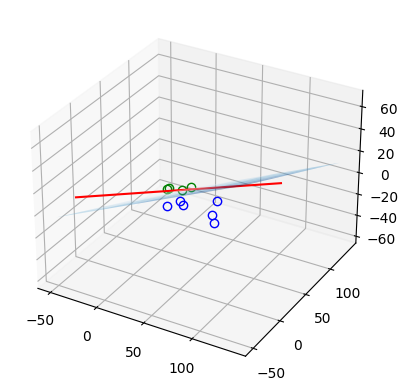

In [12]:
# 3-3

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

# 결과 데이터 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = []
y1 = []
z1 = []

x_1 = []
y_1 = []
z_1 = []

for i in range(len(y_pred)):
  # 예측값이 1(실험성공) -> x1, y1, z1에 추가
  if y_pred[i] > 0:
    x1.append(x[i][0])
    y1.append(x[i][1])
    z1.append(1)
  # 예측값이 0(실험실패) -> x_1, y_1, z_1에 추가
  else:
    x_1.append(x[i][0])
    y_1.append(x[i][1])
    z_1.append(-1)


X = np.arange(-0.5, 1.5, 0.1)*100
Y = np.arange(-0.5, 1.5, 0.1)*100
X, Y = np.meshgrid(X, Y)
# Z = (float(-0.027) * Y) + (float(0.021) * X) + float(0.599) # 교재 경사하강법
Z = (float(W[0]) * Y) + (float(W[1]) * X) + float(B) 

ax.plot(x1, y1, z1, linestyle="none", marker="o", mfc="none", markeredgecolor="g") #샘플 출력
ax.plot(x_1, y_1, z_1, linestyle="none", marker="o", mfc="none", markeredgecolor="b") #샘플 출력
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.4, cmap=cm.Blues) # 평면 출력
ax.plot([-50, 100], [-16.7037, 99.9629], [0,0],'r-') # 선 출력

plt.show()

In [13]:
# 3-4

pred = 47*W[0] + 29*W[1] + B
pred = np.where(pred > 0, 1, -1)

if pred > 0: # 예측값(pred) == 1 -> 실험 성공
  print("입력한 실험은 학습 모델에 의해 실험 성공으로 판단됩니다.")
else: # 예측값(pred) == 0 -> 실험 실패
  print("입력한 실험은 학습 모델에 의해 실험 실패로 판단됩니다.")

입력한 실험은 학습 모델에 의해 실험 실패로 판단됩니다.


4번

In [14]:
# 4-1

import numpy as np
import pandas as pd
import math
from collections import Counter

# 엔트로피 구하는 함수
def entropy(s):
    counts = np.bincount(s)
    percentages = counts / len(s)
    
    entropy = 0 # 엔트로피 초기값은 0
    for pct in percentages:
      # log의 진수 -> 0보다 커야함
      if pct > 0:
          entropy += pct * np.log2(pct) # 엔트로피 계산
    return -entropy

# 정보획득량 구하는 함수
def information_gain(parent, left_child, right_child):
    num_left = len(left_child) / len(parent)
    num_right = len(right_child) / len(parent)
    
    # 정보획득량
    gain = entropy(parent) - (num_left * entropy(left_child) + num_right * entropy(right_child))
    return gain

# 현재 노드의 왼쪽과 오른쪽 자식 트리를 나눠주는 함수
def LR_split(data, idx):
  l = []
  r = []

  data = data.tolist()
  for i in range(len(data)):
    if data[i][idx] == 1: # 값이 긍정(1)이면 왼쪽 자식 트리로
      l.append(data[i])
    else: # 값이 부정(0)이면 오른쪽 자식 트리로
      r.append(data[i])
  return np.array(l), np.array(r) # 자식 트리들 반환

In [15]:
# 인자로 받은 데이터를 통해 결정트리를 만들어 내는 함수
def build_tree(data):
    target = data[:, -1]
    unique_targets = np.unique(target)
    
    # 리프 노드인 경우
    if len(unique_targets) == 1:
        return unique_targets[0]
    
    # 가장 좋은 특성을 찾음
    best_gain = 0
    best_feature_idx = None
    for i in range(data.shape[1] - 1):
        parent_entropy = entropy(target)
        left_data, right_data = LR_split(data, i)
        if len(left_data) == 0 or len(right_data) == 0:
            continue
        gain = information_gain(target, left_data[:, -1], right_data[:, -1])
        if gain > best_gain:
            best_gain = gain
            best_feature_idx = i
    
    # 가장 좋은 특성을 이용하여 데이터를 나눔
    left_data, right_data = LR_split(data, best_feature_idx)
    if len(left_data) == 0 or len(right_data) == 0:
        return Counter(target).most_common(1)[0][0]
    left_subtree = build_tree(left_data)
    right_subtree = build_tree(right_data)
    
    # 노드 구성 : 현재 노드가 어떤 특징인지, 현재 노드의 왼오 자식트리
    node = {}
    node['feature'] = str(best_feature_idx)
    node['left'] = left_subtree
    node['right'] = right_subtree

    # 노드를 구성하여 반환
    return node

In [16]:
pd_data = pd.read_csv('train_data.csv') # train_data.csv 파일을 pandas DataFrame 으로 읽어오기
features = pd_data.iloc[:, :-1] # 4 가지 특징에 대해 데이터 선택
target = pd_data.iloc[:, -1:] # 클래스 부분만 선택
target = target.to_numpy()
target = target.reshape(-1)

df = pd.DataFrame([])

for i in range(len(target)):
  df = pd.concat([df, pd_data.iloc[i:i+1, :]])

# 학습할 데이터 즉, 트리를 구성하기 위한 데이터인 train을 전처리
# train 데이터는 요소들의 type이 int인 넘파이 배열
train = df.to_numpy()

for i in range(len(target)):
  if train[i][4] == 'Dog':
    train[i][4] = 1
  else:
    train[i][4] = 0
train = train.astype(np.int64)

tree = build_tree(train)
print(tree)

{'feature': '0', 'left': {'feature': '2', 'left': {'feature': '1', 'left': 1, 'right': 0}, 'right': 1}, 'right': {'feature': '3', 'left': 0, 'right': {'feature': '1', 'left': 1, 'right': 0}}}


In [17]:
# 4-2

pd_data = pd.read_csv('test_data.csv') # train_data.csv 파일을 pandas DataFrame 으로 읽어오기

df = pd.DataFrame([])

for i in range(10):
  df = pd.concat([df, pd_data.iloc[i:i+1, :]])

# test data 전처리
test = df.to_numpy()

for i in range(10):
  if test[i][4] == 'Dog':
    test[i][4] = 1
  else:
    test[i][4] = 0
test = test.astype(np.int64)

In [18]:
# 구해진 트리를 토대로 한 예측 함수
def predict(x, diction):
  
  # 현재 노드의 타입이 딕셔너리가 아니면 리프 노드
  # tree의 리프 노드에 개인지 고양이인지 저장됨
  if type(diction) != dict:
    return diction
  else:
    idx = int(diction['feature']) # 현재 노드가 어떤 피쳐인지
    if x[idx] == 1: # 1이면 왼쪽으로
      return predict(x, diction['left'])
    else: # 0이면 오른쪽으로
      return predict(x, diction['right'])

In [19]:
np_data = pd_data.to_numpy()
# 10개의 test data 분석 결과 출력
for i in range(10):
  if predict(test[i], tree) == 1: # 1 -> 개
    print("Test #", i, " ", np_data[i], " -> Dog")
  else: # 0 -> 고양이
    print("Test #", i, " ", np_data[i], " -> Cat")

Test # 0   [1 1 0 0 'Dog']  -> Dog
Test # 1   [0 0 1 1 'Cat']  -> Cat
Test # 2   [1 1 0 0 'Dog']  -> Dog
Test # 3   [0 0 1 1 'Cat']  -> Cat
Test # 4   [1 1 0 1 'Dog']  -> Dog
Test # 5   [1 1 1 0 'Dog']  -> Dog
Test # 6   [1 0 1 1 'Cat']  -> Cat
Test # 7   [1 0 0 1 'Dog']  -> Dog
Test # 8   [0 1 1 1 'Cat']  -> Cat
Test # 9   [1 1 1 0 'Dog']  -> Dog
